<a href="https://colab.research.google.com/github/ShahidIIM/Evaluation_Project/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Netflix Movies and TV Shows Clustering**

# Project Summary

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

innitially we start with understanding the data set, then we clean the data to make analysis ready.

explore the data and understand the behaviour of the same.

we then prepare the data for creating clusters by various parameters wherein we remove stop words, white spaces numbers etc so that we can get important words and based on that we shall form clusters.

later I have used the silhoute method and kmeans elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top 5 movies.

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Import Libraries

In [47]:
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *


import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Dataset

In [48]:
df = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [49]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [50]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [51]:
# Dataset Rows & Columns count
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 7787 rows and 12 columns


In [52]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [53]:

# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')
     

number of duplicated rows are 0


In [54]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)
print('-'*30)
print('Missing values in percentage')
print('-'*30)
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
Missing values in percentage
------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


Text(0.5, 1.0, 'Visualizing the missing values')

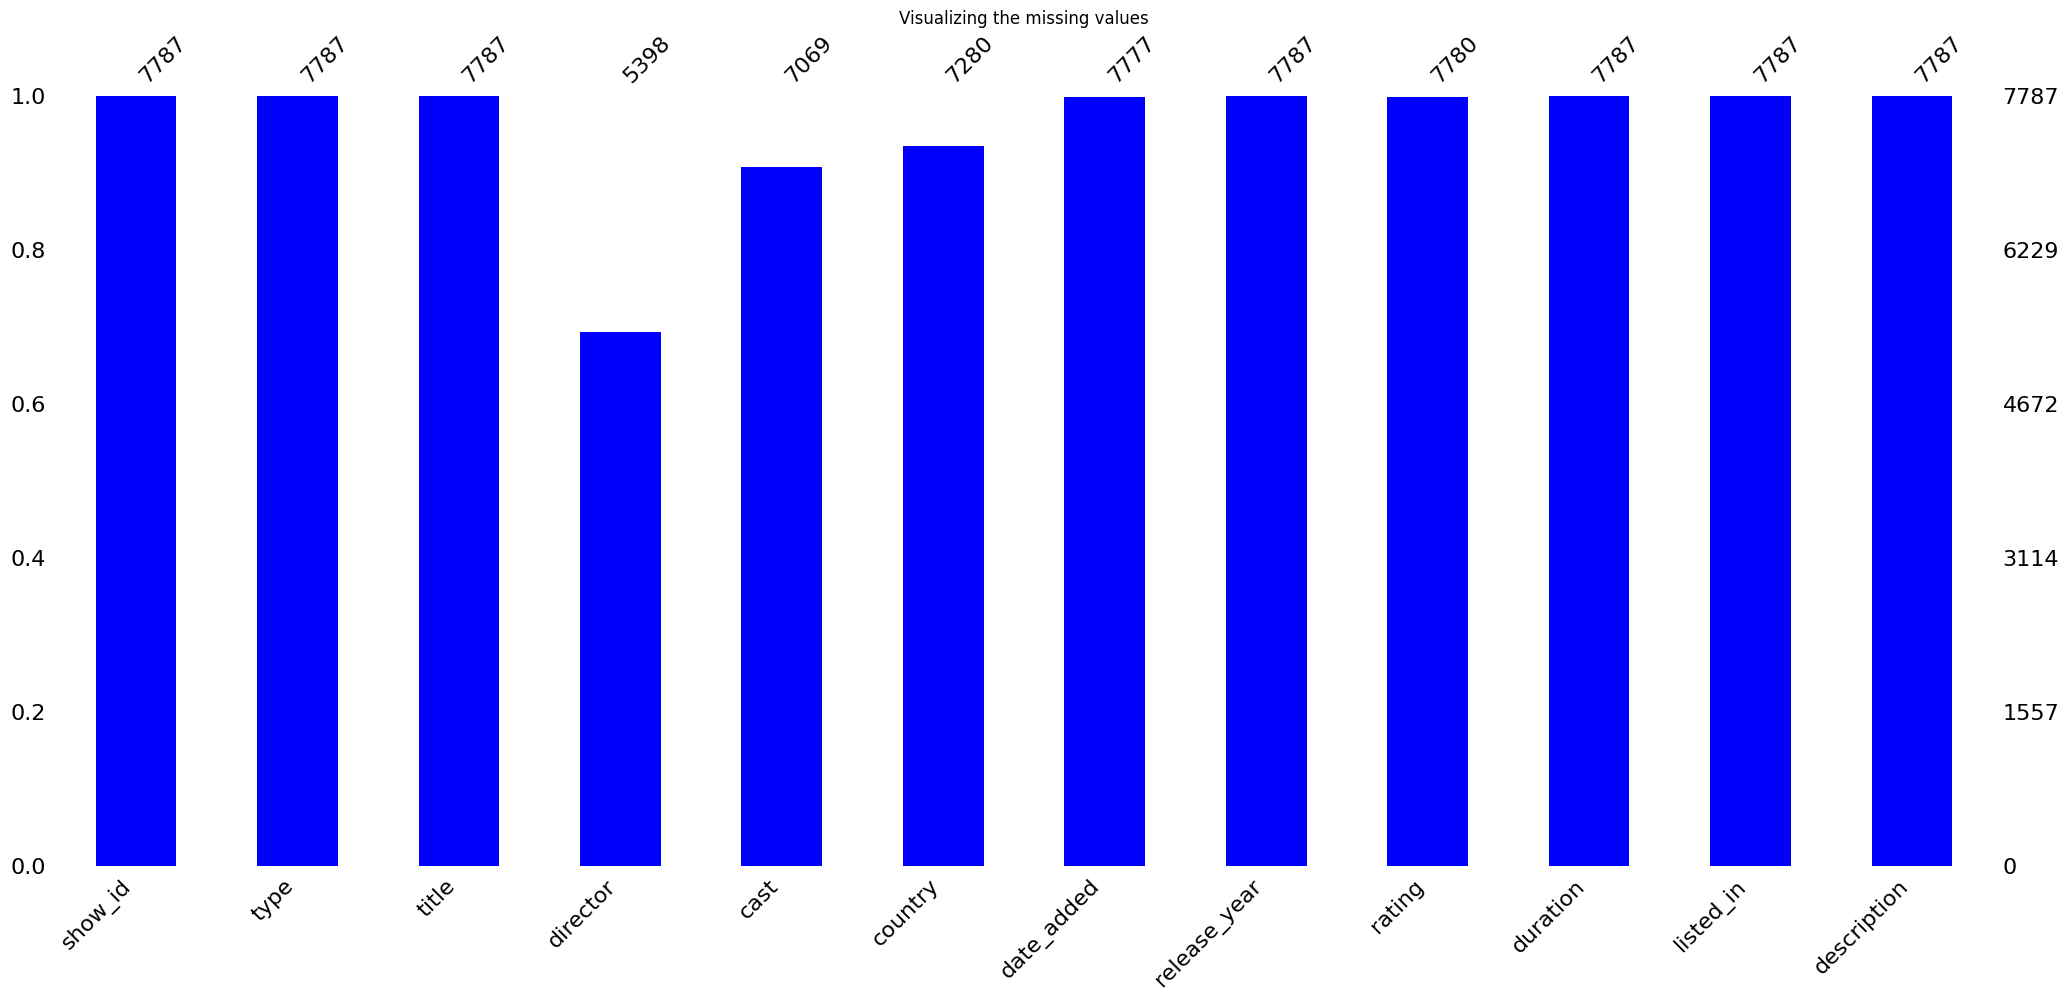

In [55]:
# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df,color = 'Blue')
# msno.heatmap(df, cmap=my_palette)
plt.title('Visualizing the missing values')

## What did you know about your dataset?

show_id: Unique Id number for all the listed rows

type: denotes type of show namely TV Show or Movie

title: title of the movie

director: Name of director/directors

cast: lists the cast of the movie

country: country of the production house

date_added: the date the show was added

release_year: year of the release of the show

rating: show ratings

duration: duration of the show

listed_in: the genre of the show

description: summary/ description of the movie

In [56]:
# Dataset Columns
col = df.columns
print(col)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [57]:
# Dataset Describe
df.describe(include = 'all')
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [58]:

# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f'The number of unique variables in {column} column are: {res}')
  if res<=15:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )
    print('--'*30)


The number of unique variables in show_id column are: 7787
The number of unique variables in type column are: 2
printing unique values of type
the values are:  ['TV Show' 'Movie']
------------------------------------------------------------
The number of unique variables in title column are: 7787
The number of unique variables in director column are: 4050
The number of unique variables in cast column are: 6832
The number of unique variables in country column are: 682
The number of unique variables in date_added column are: 1566
The number of unique variables in release_year column are: 73
The number of unique variables in rating column are: 15
printing unique values of rating
the values are:  ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
------------------------------------------------------------
The number of unique variables in duration column are: 216
The number of unique variables in listed_in column are: 492
The number of u

In [59]:
# filling cast value as not available
df['cast'] = df['cast'].fillna(value='Not available')

# filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
df['country'] = df['country'].fillna(value='Not Known')
# df['country'] = df['country'].fillna(value=df['country'].mode())

# since date_added and rating have low % share that is 0.13 and 0.09 we are dropping the same
df = df.dropna(subset=['date_added','rating'])
# since too many missing values in director column, we are dropping the same
df = df.drop(['director'],axis=1)

In [60]:
# checking missing value again for confirmation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

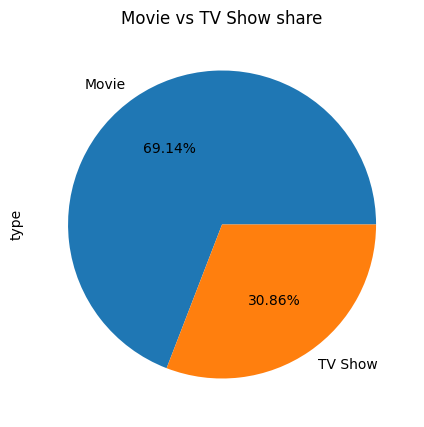

In [61]:
# Chart - 1 visualization code
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Movie vs TV Show share')
plt.show()

69.05% of the data is of movies while 30.95% of the data belongs to TV Shows

the insights show us that most of the data is of movies

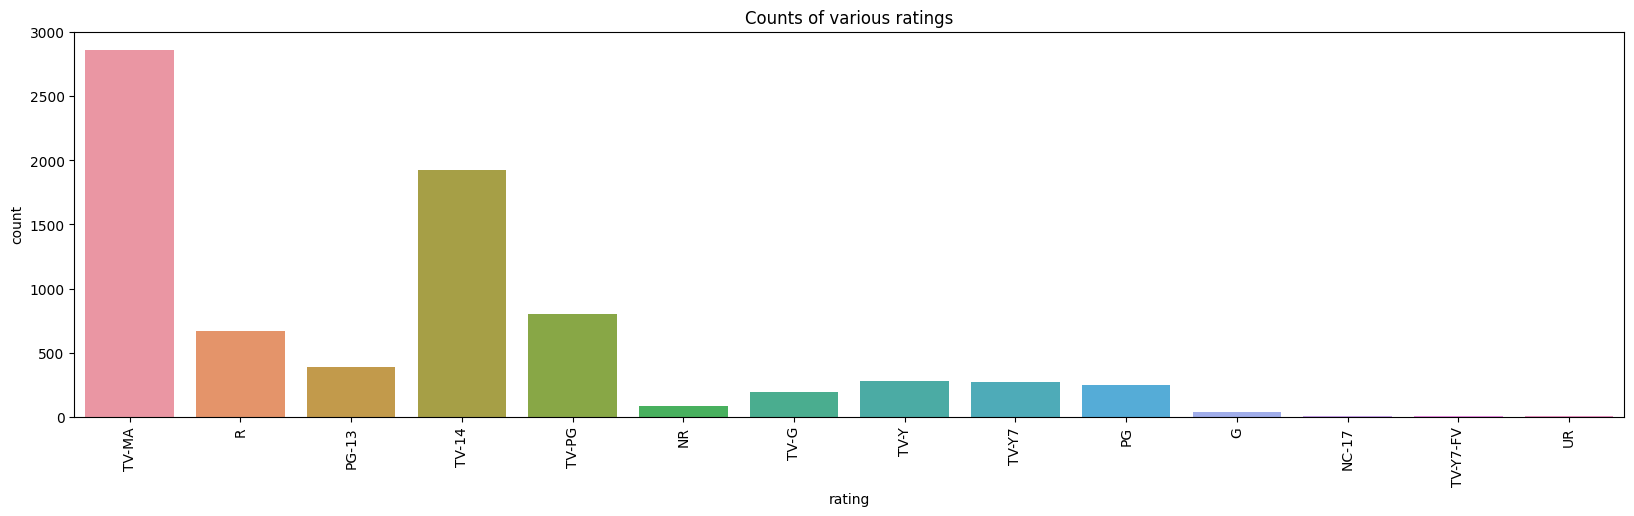

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


In [62]:
# Chart - 2 visualization code 
plt.figure(figsize=(20, 5))
sns.countplot(x='rating', data=df)

# setting chart title
plt.title('Counts of various ratings')
plt.xticks(rotation = 90)

# display chart
plt.show()

# printing the counts for reference
print(df.rating.value_counts())

It is found that most of the ratings are given by TV-MA(2863) followed by TV-14(1931) the least ratings are by NC-17(3)

The Gained insites are good to understand the ratings system on the dataframe

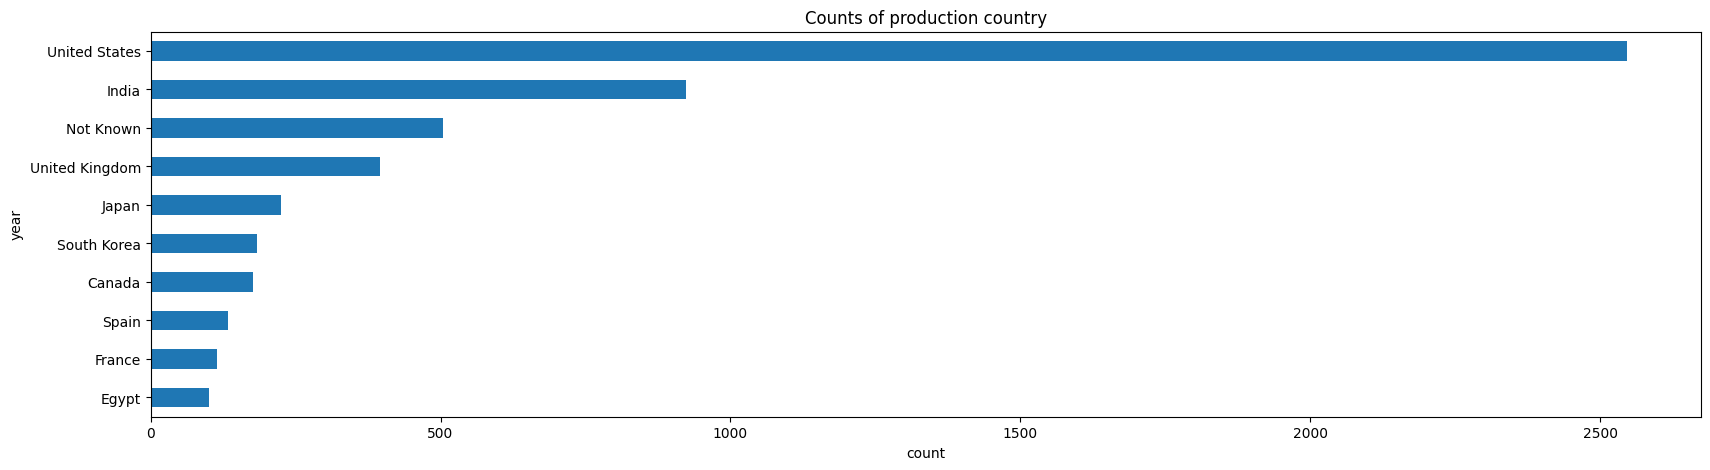

United States     2546
India              923
Not Known          505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


In [63]:
# Chart - 3 visualization code

plt.figure(figsize=(20, 5))
df['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
# sns.countplot(x='country', data=df)

# setting chart title
plt.title('Counts of production country')
# plt.xticks(rotation = 90)
plt.ylabel('year')
plt.xlabel('count')
# display chart
plt.show()

# printing the counts for reference
print(df.country.value_counts().head(10))

the content belongs to United states alone is 2546, followed by India

It helps us understand that most of the data we have belongs to United states followed by India

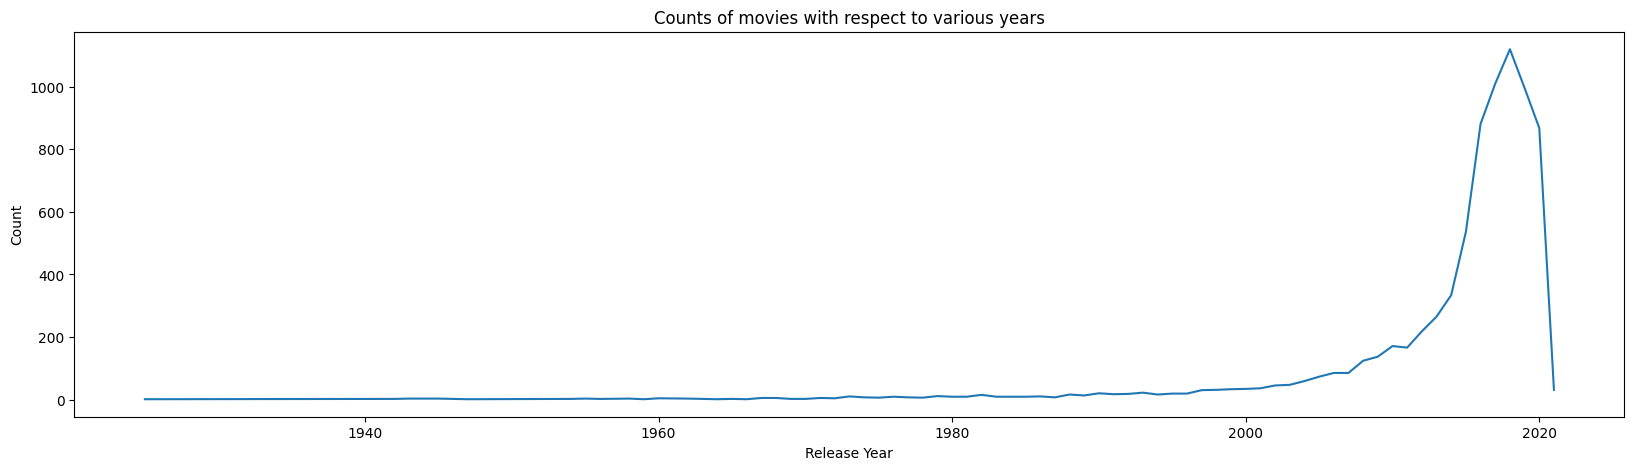

In [64]:
# Chart - 4 visualization code
# creating temp dataframe
temp_data_df = df.groupby(['release_year'])['show_id'].count()
plt.rcParams['figure.figsize'] = (20, 5)

# plotting the temp df
temp_data_df.plot.line()
# setting chart title
plt.title('Counts of movies with respect to various years')
plt.ylabel('Count')
plt.xlabel('Release Year')
# display chart
plt.show()

# deleting the temporary dataframe for optimization of memory
del temp_data_df

It is observed that most of the movies on netflix are of the reliese date from 2010 to 2018.

This helps us to understand that most of the movies released are new or old, its found that most are from recently released.

In [65]:
# seperating and creating 2 dataframe based on type
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']

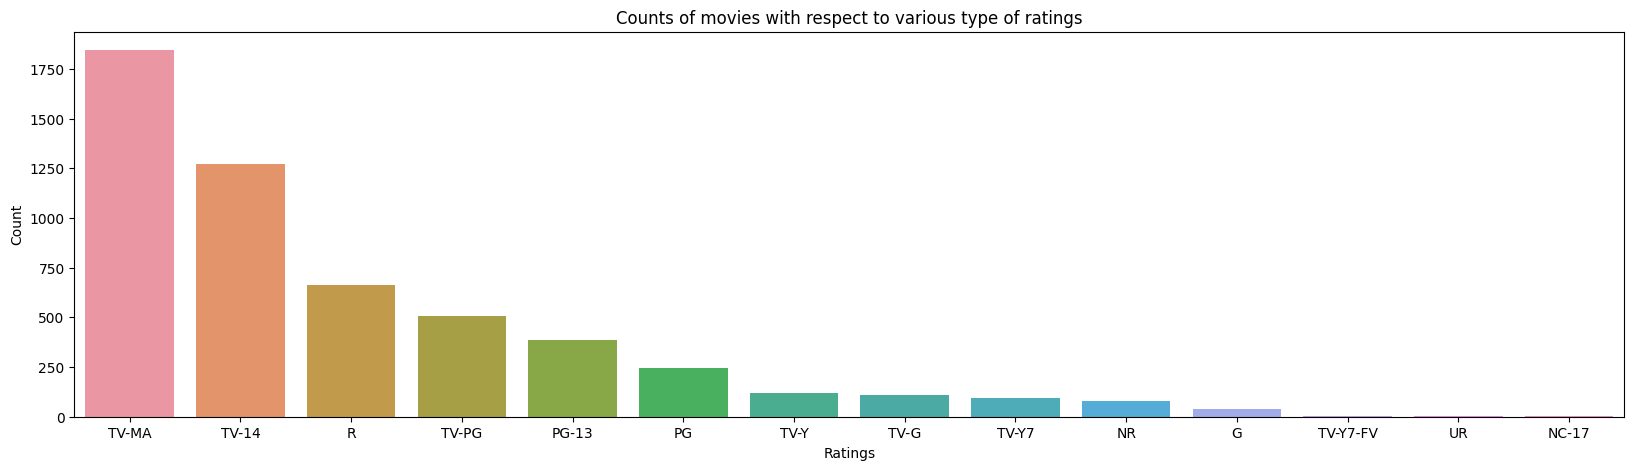

In [66]:
# Chart - 5 visualization code

movie_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
movie_ratings = movie_ratings.sort_values('count', ascending=False).reset_index()
# top10_movies = movies_df['listed_in'].value_counts().reset_index(name='count').head(10)
# print(top10_movies)
sns.barplot(x='rating',y='count',data=movie_ratings)

# setting chart title
plt.title('Counts of movies with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(movie_ratings)
# deleting the movie_ratings dataframe for optimization of memory
del movie_ratings

It is found that TV-MA has more ratings that is 1845 followed by TV-14 1272 and NC-17 are least with 3 and UR with 5

The chart is just to understand the trends of ratings for movies

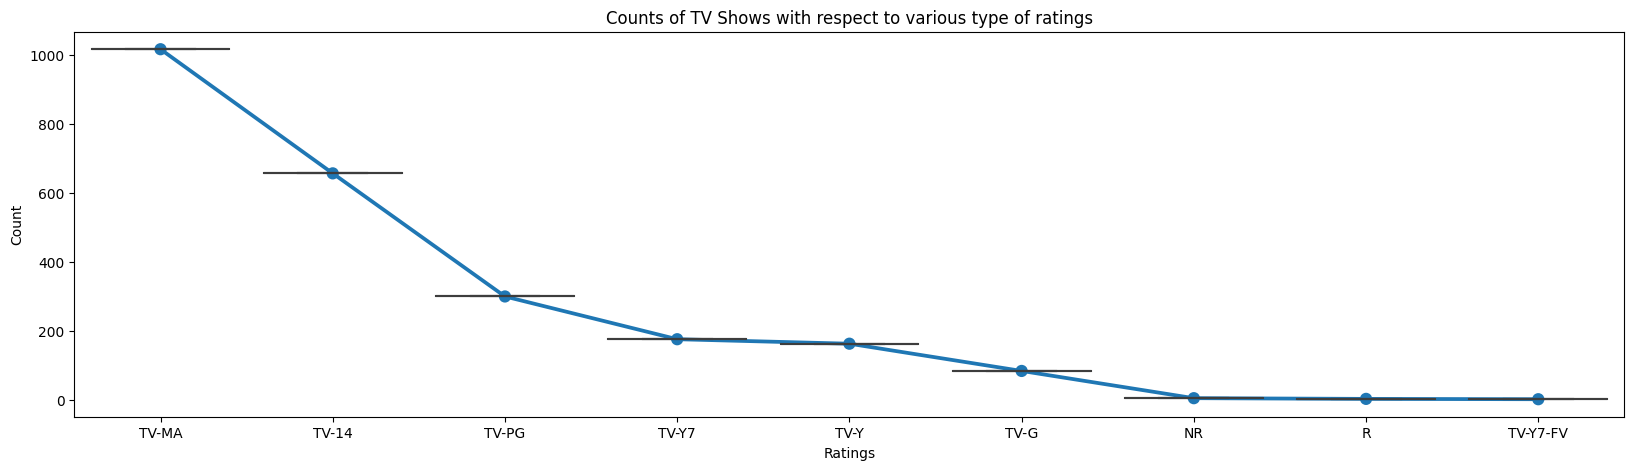

In [67]:
# Chart - 6 visualization code
tv_shows_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
tv_shows_ratings = tv_shows_ratings.sort_values('count', ascending=False).reset_index()

sns.pointplot(x='rating',y='count',data=tv_shows_ratings)
sns.boxplot(x='rating',y='count',data=tv_shows_ratings)

# setting chart title
plt.title('Counts of TV Shows with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(tv_shows_ratings)

# deleting the movie_ratings dataframe for optimization of memory
del tv_shows_ratings

It is found that TV-MA rating is max that is 1016 for the TV Shows followed by 656 for TV-14 the least ratings are by TV-Y7-FV that is 1 and R is 2

The chart is just to understand the trends of ratings for TV shows

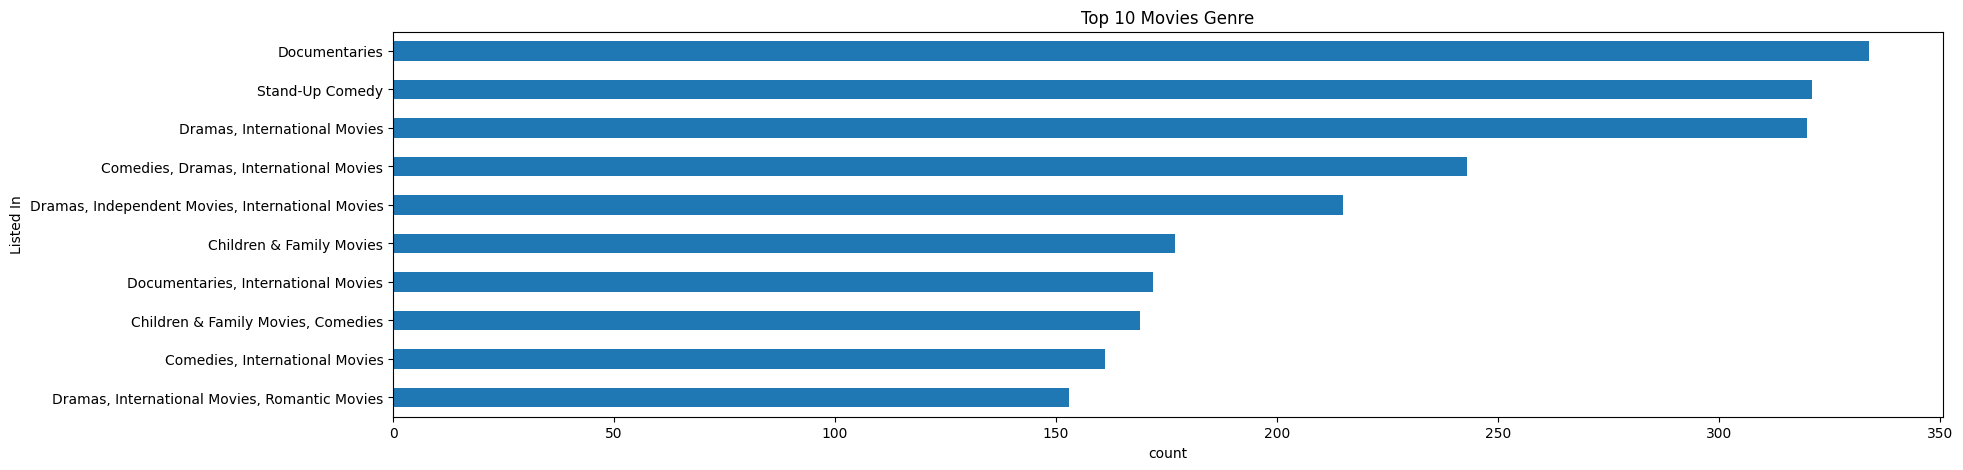

Dramas, International Movies, Romantic Movies       153
Comedies, International Movies                      161
Children & Family Movies, Comedies                  169
Documentaries, International Movies                 172
Children & Family Movies                            177
Dramas, Independent Movies, International Movies    215
Comedies, Dramas, International Movies              243
Dramas, International Movies                        320
Stand-Up Comedy                                     321
Documentaries                                       334
Name: listed_in, dtype: int64


In [68]:
# Chart - 7 visualization code
# getting counts of different movies in listed in
top10_movies = movies_df['listed_in'].value_counts()
# sorting based on counts
top10_movies = top10_movies.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_movies = top10_movies.tail(10)

# plotting
top10_movies.plot(kind='barh')
# setting chart title
plt.title('Top 10 Movies Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

print(top10_movies)
# deleting the movie_ratings dataframe for optimization of memory
del top10_movies

It is found that there are 334 documentaries and 321 Standup comedy

The chart is just to understand the trendsof movies Genre

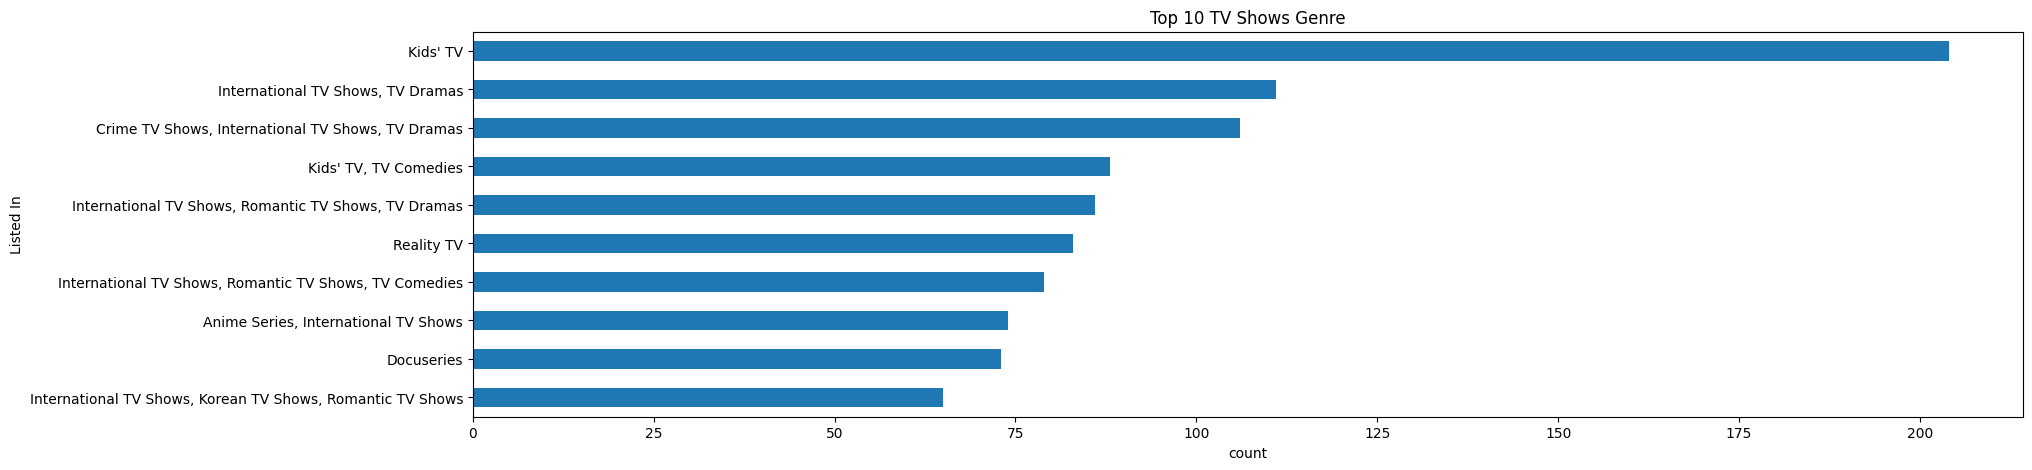

In [69]:
# Chart - 8 visualization code

# getting counts of different TV shows in listed in
top10_TV_Shows = tv_shows_df['listed_in'].value_counts()
# sorting based on counts
top10_TV_Shows = top10_TV_Shows.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_TV_Shows = top10_TV_Shows.tail(10)

# plotting
top10_TV_Shows.plot(kind='barh')
# setting chart title
plt.title('Top 10 TV Shows Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

# print(top10_TV_Shows)
# deleting the movie_ratings dataframe for optimization of memory
del top10_TV_Shows

Kids' TV has max count as 204 followed by International TV Shows, TV Dramas with 111

The chart is just to understand the trends of TV shows Genre

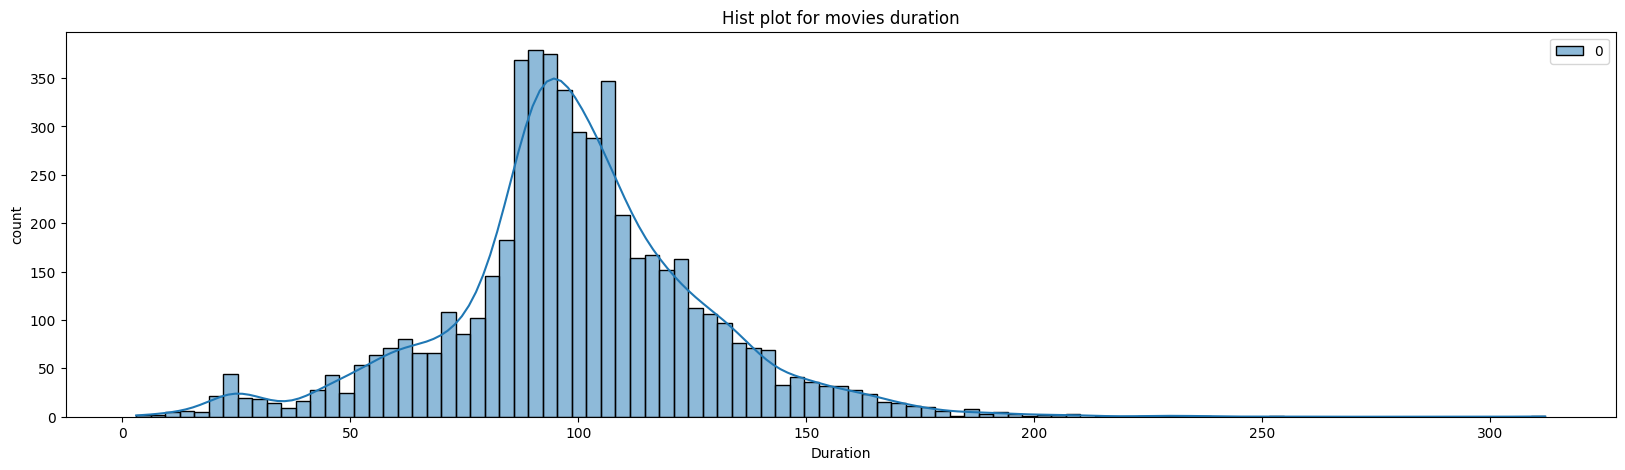

In [70]:
# Chart - 9 visualization code

sns.histplot(movies_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')

# setting chart title
plt.title('Hist plot for movies duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

Most of the movies range in 90-95 mins

the plot is to understand what is avg time for movies

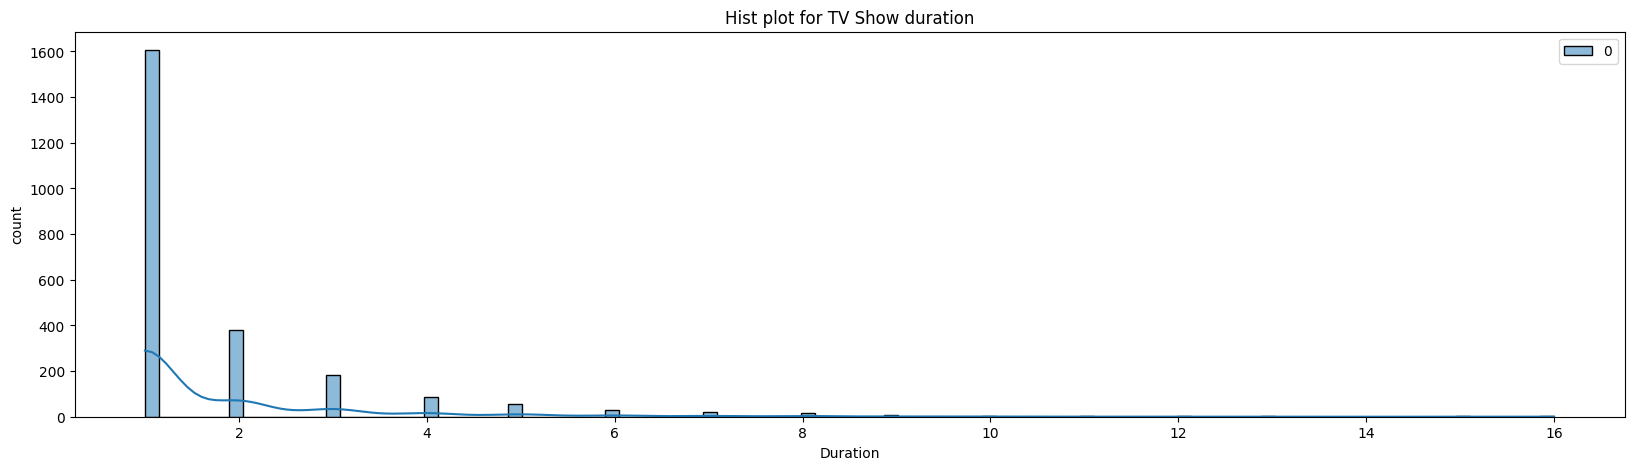

In [71]:
# Chart - 10 visualization code
sns.histplot(tv_shows_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for TV Show duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

The provided dataframe is not suitable to claculate the time duration for TV shows

The output CSV files must be improved

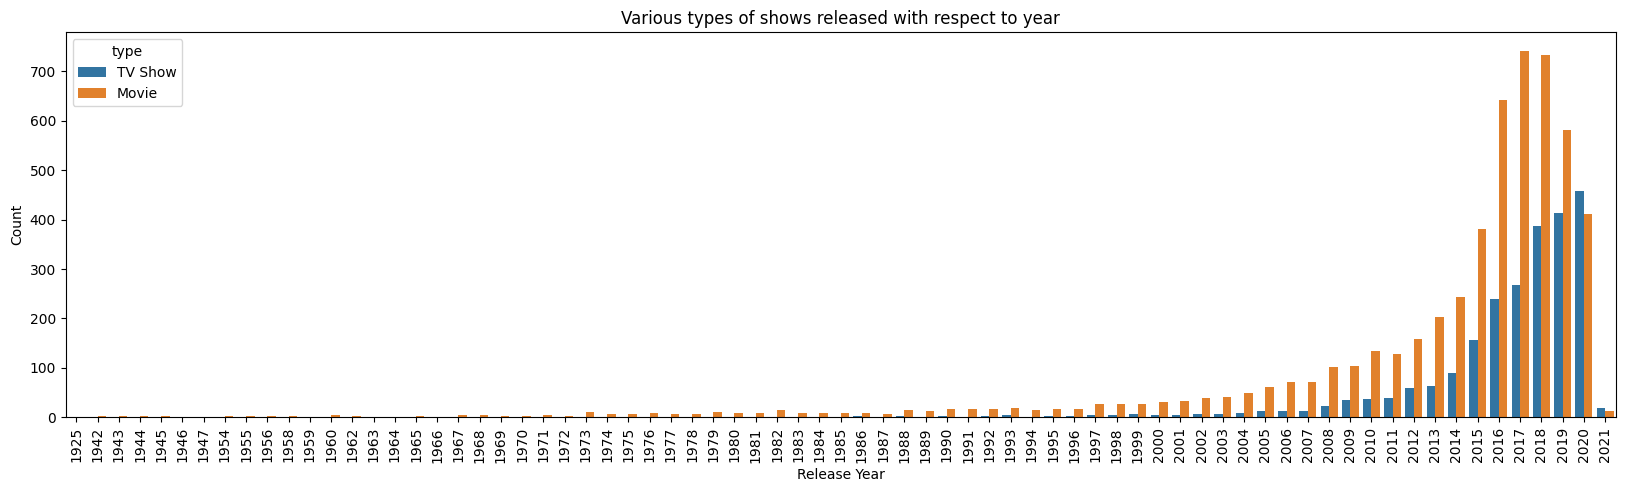

In [72]:
# Chart - 11 visualization code

sns.countplot(x='release_year',hue='type', data=df)

# setting chart title
plt.title('Various types of shows released with respect to year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')

# display chart
plt.show()

The trends of TV shows increased over time

the moves relased after 2010 started to list on netflix trends increased.



Text(0.5, 58.5815972222222, 'Feature/Property')

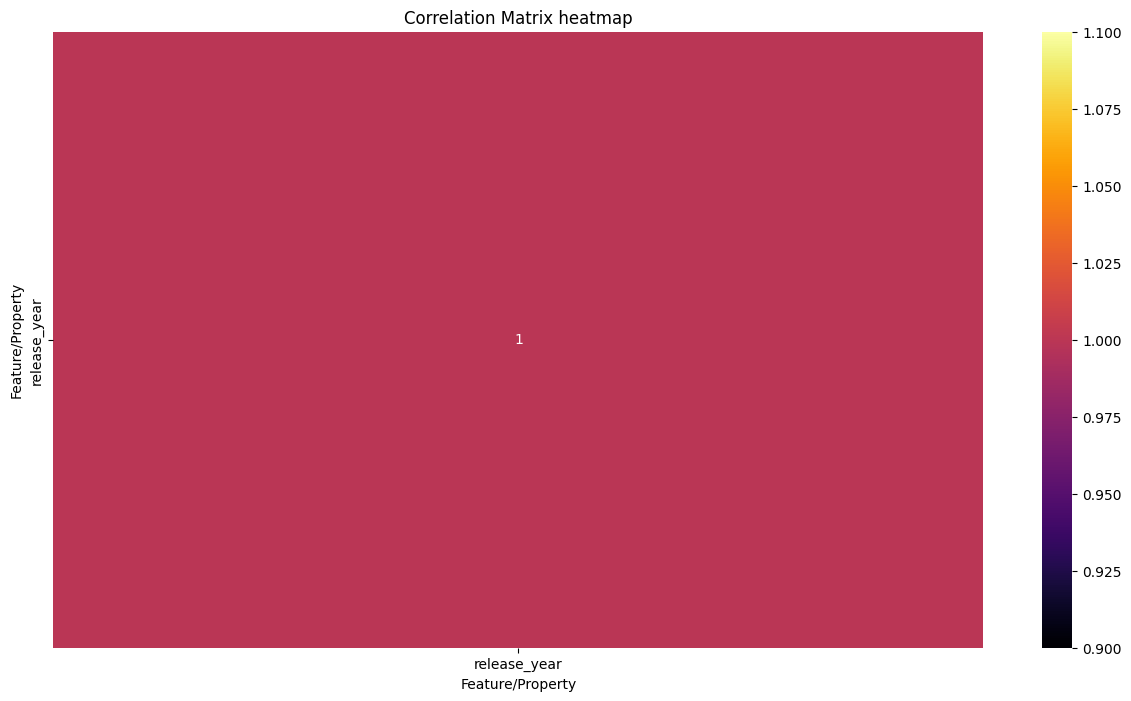

In [73]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

The corelation chart shows the relation between the two specific feature

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap

Text(0.5, 0, 'Feature/Property')

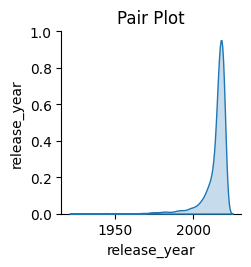

In [74]:
# Pair Plot visualization code

sns.pairplot(df, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.

## Hypothesis Testing

In [75]:
# Perform Statistical Test to obtain P-Value

# Filter the movies DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only movies produced in India
us_movie_df = movies_df[movies_df.country == 'United States']
india_movie_df = movies_df[movies_df.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t, p = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p < alpha:
  # If the p-value is less than the significance level, reject the null hypothesis
  print("We reject the null hypothesis.")
else:
  # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
  print("We fail to reject the null hypothesis.")

# deleting the temporary dataframe we obtained to calculate the alpha value
del us_movie_df
del india_movie_df

We reject the null hypothesis.


I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movie data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

In [76]:
# Perform Statistical Test to obtain P-Value

# Convert the date_added column of the DataFrame to a datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month name from the date_added column and create a new column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the type and month_added columns
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test on the contingency table
from scipy.stats import chi2_contingency
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Rounding to 2
chi2_statistic = round(chi2_statistic, 2)
p_value = round(p_value, 2)

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
     

Chi-square statistic: 16.05
P-value: 0.14


I choose the chi-square test for independence as I was interested in testing for a potential association between two categorical variables.

In [77]:
# Count the number of movies and TV shows in the DataFrame
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Print the number of movies and TV shows
# print('Number of movies:', n_movies)
# print('Number of TV shows:', n_tv_shows)

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Print the counts and sample sizes
print('After setting counts and sample sizes for the z-test:')
print('Counts:', counts)
print('Sample sizes:', nobs)

# Perform a z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results of the z-test
print('After performing the z-test assuming equal proportions:')
print('z-statistic:', z_stat)
print('p-value:', p_val)

# deleting the temporary dataframe we obtained
del n_movies
del n_tv_shows

After setting counts and sample sizes for the z-test:
Counts: [5372, 2398]
Sample sizes: [7770, 7770]
After performing the z-test assuming equal proportions:
z-statistic: 47.71395895355864
p-value: 0.0


I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables

## Feature Engineering & Data Pre-processing

Handling Missing Values

In [78]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
dtype: int64

### Textual Data Preprocessing

In [79]:
# Create a new column called 'tags' in the DataFrame 'df'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in', and 'cast' columns
df['tags'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [80]:
# cross checking our result for the function created
print(df['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


In [81]:
# Lower Casing
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(to_lower)

# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


In [82]:
# Remove Punctuations

# Define a function to remove punctuation from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    
    # Return the text with punctuation removed
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_punctuation)

# Print the first 'tags' value to cross-check that the function worked as expected
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [83]:
# Remove URLs & Remove words and digits contain digits
# our tags column doesnot have links so removing numbers
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)
# remove words and digits containing digits

# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [84]:
# Remove Stopwords
# since the language is english, we need to import english stop words
stop_words = stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

  
# cross checking our result for the function created
print('before')
print(df['tags'][0])
# applying the created function
df['tags'] = df['tags'].apply(remove_stop_words)
# cross checking our result for the function created
print('after')
print(df['tags'][0])

before
in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi
after
 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [85]:
# Remove White spaces
# remove white spaces in the 'tags'
df['tags'] = df['tags'].str.strip()
# cross checking our result for the function created

print(df['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [86]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

df['tags'] = df['tags'].apply(stemming)


# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)   
# setting max features = 9000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [87]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of vector : (7770, 9000)
datatype : <class 'numpy.ndarray'>


Word/Text vectorization is useful because most machine learning algorithms cannot work with raw text data directly. Instead, they require numerical inputs that can be processed mathematically. Word/Text vectorization solves this problem by transforming the text data into numerical vectors that can be understood by machine learning algorithms.

### Dimesionality Reduction

In [45]:
# using PCA to reduce dimensionality
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

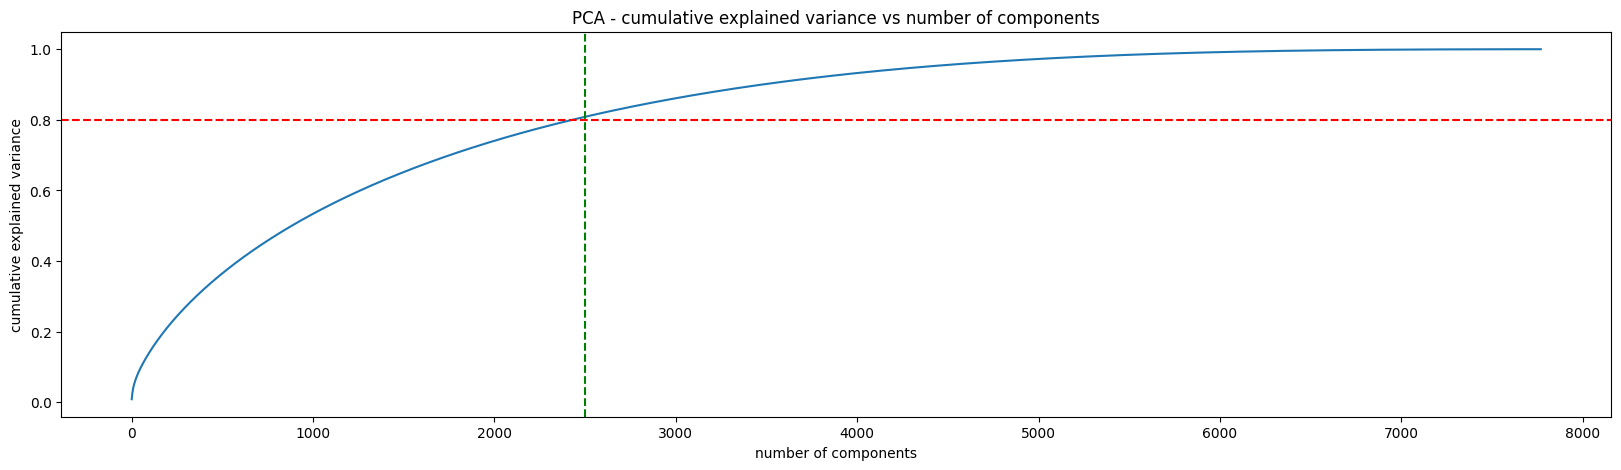

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')
plt.show()

In [88]:
# reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [89]:
# transformed features
X = pca.transform(vector)

## ML Model Implementation

Silhouette Score(2-12)

For n_clusters = 2, silhouette score is 0.007429099323706862
For n_clusters = 3, silhouette score is 0.009413991826192103
For n_clusters = 4, silhouette score is 0.009999801185751578
For n_clusters = 5, silhouette score is 0.008994259581081469
For n_clusters = 6, silhouette score is 0.012325668966087827
For n_clusters = 7, silhouette score is 0.010056800415628309
For n_clusters = 8, silhouette score is 0.010823871101935768
For n_clusters = 9, silhouette score is 0.011306963609961992
For n_clusters = 10, silhouette score is 0.0124493062227502
For n_clusters = 11, silhouette score is 0.012281275525494127


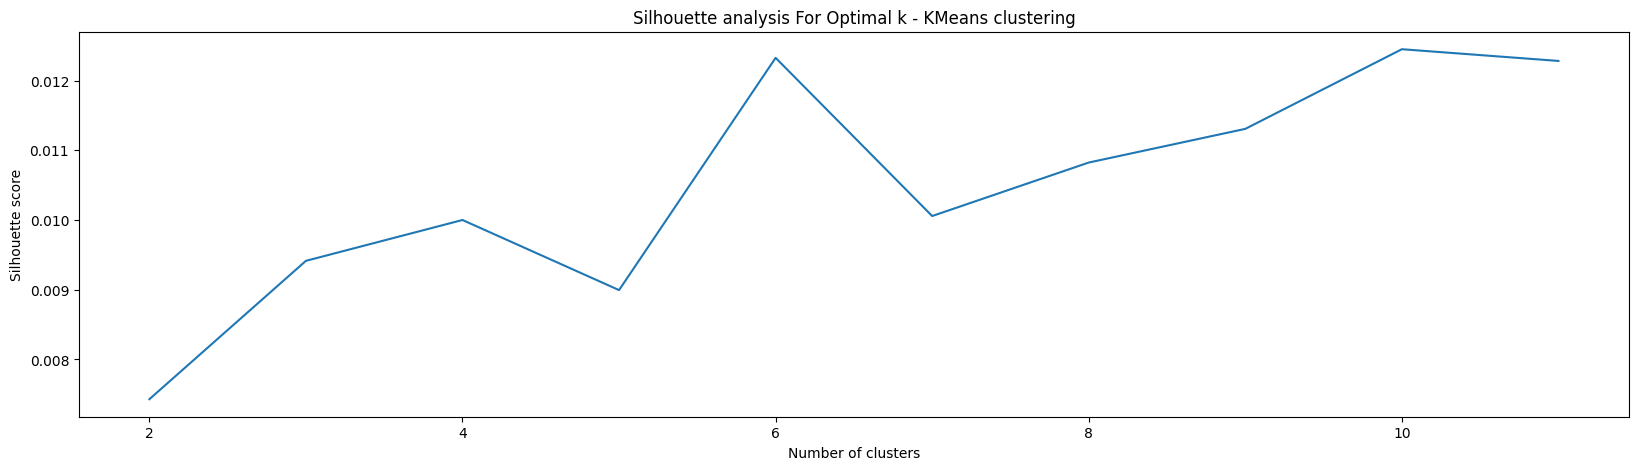

In [90]:
silhouette_avg = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(range(2,12), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [91]:
# Clustering the data into 10 clusters as silhouette score is max 0.0124493062227502
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=32)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=32)

In [92]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Kmeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')

Kmeans distortion = 5922.806536271179
Silhouette Score = 0.011508564117823335


In [93]:
# updating kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [94]:
# checking if the column is added correctly to the df
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,futur elit inhabit island paradis far crowd sl...,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devast earthquak hit mexico citi trap survivor...,8
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,armi recruit found dead fellow soldier forc co...,8
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalypt world ragdol robot hide fear dan...,6
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group student becom cardcount expert...,6


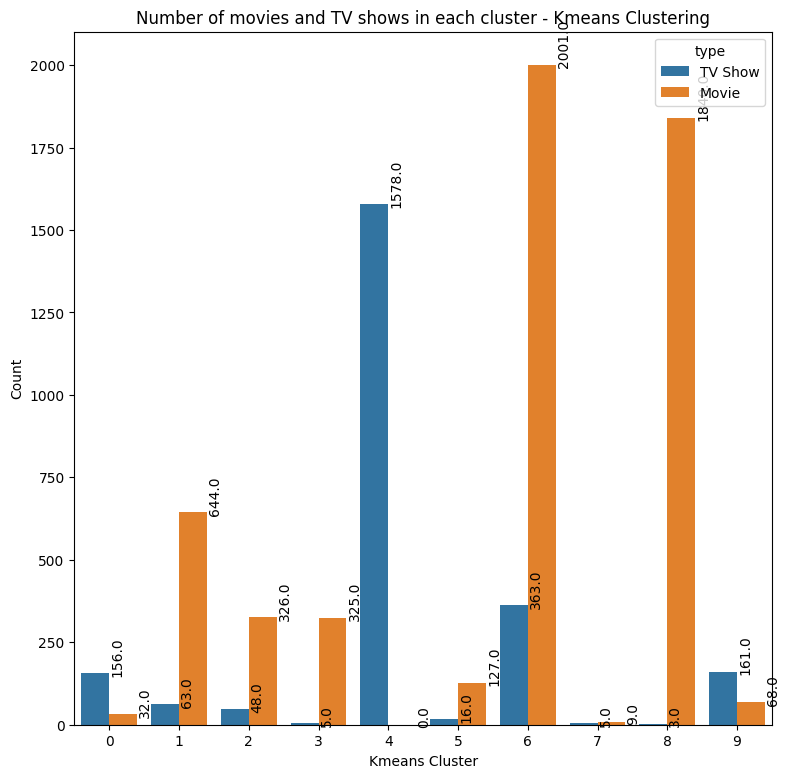

In [95]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(9,9))
sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
plt.xlabel('Kmeans Cluster')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

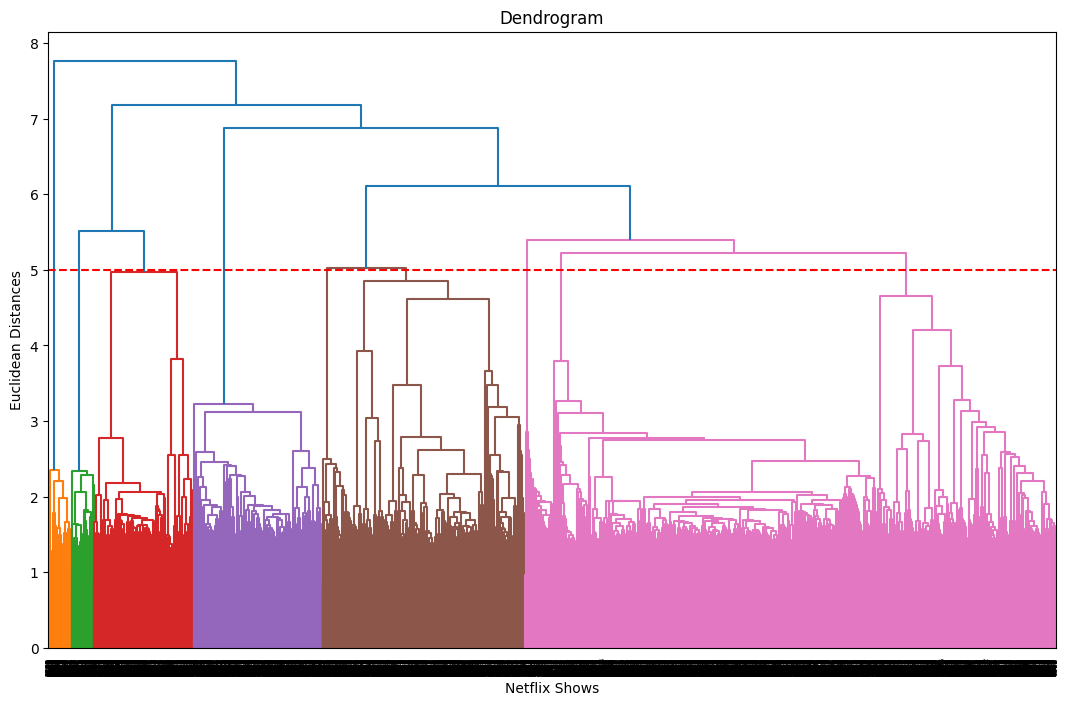

In [96]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 5, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show() 

In [97]:
from sklearn.metrics.pairwise import euclidean_distances

In [98]:
from sklearn.metrics.pairwise import euclidean_distances

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = hierarchical.fit_predict(X)
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [99]:
df.head().columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'tags', 'kmeans_cluster', 'hierarchical_cluster'],
      dtype='object')

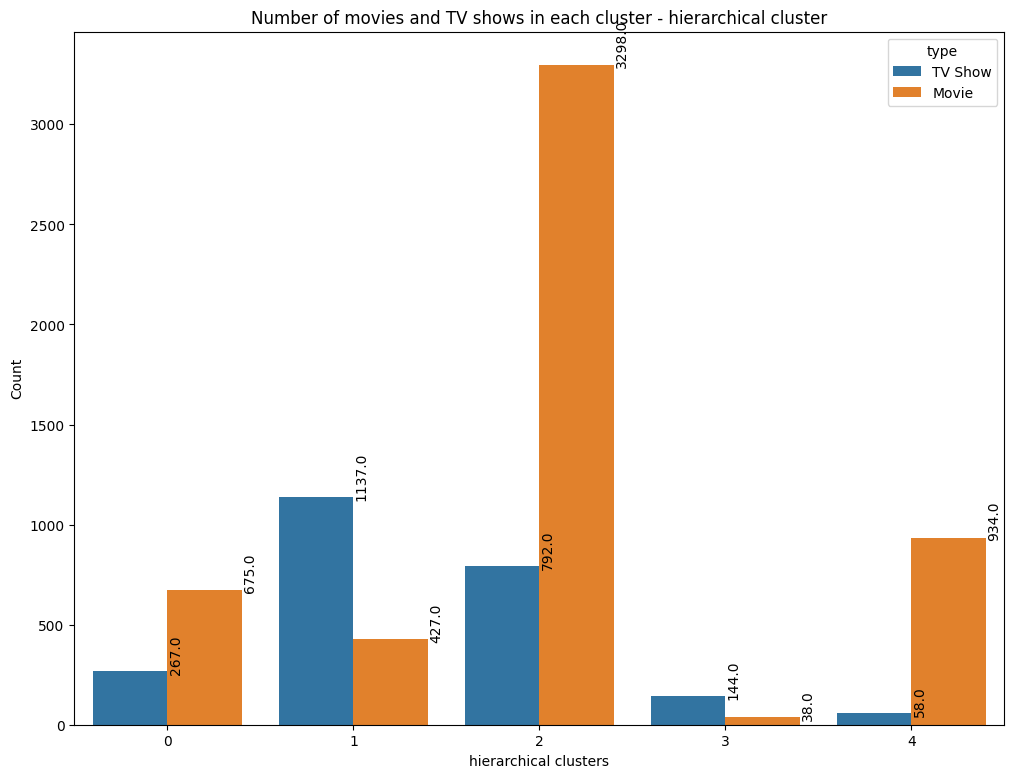

In [100]:
plt.figure(figsize=(12,9))
sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - hierarchical cluster')
plt.xlabel('hierarchical clusters')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

### Preparing datafram for the recommender system

In [101]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [102]:
recommender_df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster,hierarchical_cluster
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,futur elit inhabit island paradis far crowd sl...,4,2
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devast earthquak hit mexico citi trap survivor...,8,2
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,armi recruit found dead fellow soldier forc co...,8,2
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalypt world ragdol robot hide fear dan...,6,2
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group student becom cardcount expert...,6,2


### Calculating the similarity

In [103]:
def recommend(movie, sim, output_name):
    '''
    This function recommends top 5 movies similar to the input movie based on their similarity scores.
    '''
    # Display the input movie name
    print('--'*30)
    print(f'recommendations based on {output_name}')
    print('--'*30)
    print(f"Since you liked {movie}, you may also like: \n")

    # Find the index position of the input movie
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # Sort the movies based on similarity score to find distances from recommended movies
    distances = sorted(list(enumerate(sim[index])), reverse=True, key=lambda x:x[1])
    
    # List the top 5 recommended movies
    for i in distances[1:6]:
        print(df.iloc[i[0]].title)
    print('\n')

In [104]:
# calculate cosine similarity on transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
# setting cos_similarity
cos_similarity = cosine_similarity(X)

# setting linear_kernel
lin_similarity = linear_kernel(X)

# setting rbf_kernel
rbf_similarity = rbf_kernel(X)

#setting sigmoid_kernel
sigmoid_similarity = sigmoid_kernel(X)

# setting polynomial_kernel
polynomial_similarity = polynomial_kernel(X)

# setting laplacian_kernel
# laplacian_similarity = laplacian_kernel(X) # commenting out as it is taking lot of time.

# setting chi2_kernel
# chi2_similarity = chi2_kernel(X) # not suitable for the given scenario

### Calculating the cosine similarity

In [105]:
# getting recommendations for the movie
recommend('Welcome', cos_similarity, 'Cosine similarity')
recommend('Welcome', lin_similarity,'linear kernel')
recommend('Welcome', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Welcome', sigmoid_similarity,'sigmoid kernel')
recommend('Welcome', polynomial_similarity,' polynomial kernel')
# recommend('Welcome', laplacian_similarity)
# recommend('Welcome', chi2_similarity)

------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Tezz
Humko Deewana Kar Gaye
Tees Maar Khan


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Tezz
Humko Deewana Kar Gaye
Tees Maar Khan


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Tezz
Humko Deewana Kar Gaye
Aitraaz
Hattrick


------------------------------------------------------------
recommendations based on sigmoid kernel
------------------------------------------------------------
Since you liked Welcome,

In [106]:
# # The below code can be uncommented to get the details and test the recommender
# # sample of US movies
# df_US = df.loc[df['type'] == 'TV Show']
# df_US.title.sample(20)

# getting recommendations for the movie
recommend('Avengers: Infinity War', cos_similarity, 'Cosine similarity')
recommend('Avengers: Infinity War', lin_similarity,'linear kernel')
recommend('Avengers: Infinity War', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Avengers: Infinity War', sigmoid_similarity,'sigmoid kernel')
recommend('Avengers: Infinity War', polynomial_similarity,' polynomial kernel')

------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar: The Movie
Marco Polo: One Hundred Eyes


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar: The Movie
Walk with Me


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar: The Movie
Mowgl

In [107]:
# # The below code can be uncommented to get the details and test the recommender
# # getting sample of Indian movies
# df_india = df.loc[df['country'] == 'India']
# df_india.title.sample(20)

# getting recommendations for the movie
recommend('Don', cos_similarity, 'Cosine similarity')
recommend('Don', lin_similarity,'linear kernel')
recommend('Don', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Don', sigmoid_similarity,'sigmoid kernel')
recommend('Don', polynomial_similarity,' polynomial kernel')

------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Delhi 6
Aitraaz


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Delhi 6
Aitraaz


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Pardes
Krishna Cottage


------------------------------------------------------------
recommendations based on sigmoid kernel
------------------------------------------------------------
Since you liked Don, yo

# Conclusion

Our objective was to cluster shows based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 5 shows to users based on their viewing history.

We began our exploration with a dataset consisting of 7787 records and 11 attributes, with a focus on missing value imputation and exploratory data analysis (EDA). The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we selected six key attributes: director, cast, country, genre, rating, and description. These attributes were transformed into a 9000-feature TFIDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. We captured more than 80% of the variance by reducing the components to 2500.

Next, we used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method and Silhouette score analysis confirmed that the optimal number of clusters was 7 for K-Means. However, Agglomerative clustering suggested 5 clusters, which we visualized with a dendrogram.

We continued our efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity. This system offers personalized recommendations based on the type of show the user has watched and provides the user with 5 top-notch suggestions to explore.